In [1]:
'''
based on param_estim.ipynb
'''

'\nbased on param_estim.ipynb\n'

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
from mpl_tools import is_notebook_or_qt as nb

In [3]:
import dapper as dpr
import dapper.da_methods as da
import dapper.mods as modelling
import dapper.tools.liveplotting as LP
from dapper.mods.PyCLES.minimal2D import *



[57 73 47]


In [4]:
# #### DA methods configurations

xps = dpr.xpList()
# xps += da.PartFilt(N=1000, reg=1)  # works OK with Nx=6
for N in [20]: # >= 2 as we need N-1 for variances
    xps += da.EnKF('Sqrt', N, infl=1.04)
    # xps += da.EnKF_N(N, xN=2)
    # for Lag in [1, 4, 20]:
        # xps += da.iEnKS("Sqrt", N, Lag=Lag, xN=2, wtol=1e-5)

In [5]:
### check obs
# direct obs of the state, adding obs noise
HMM, xx, yy = set_X0_and_simulate(HMM,xps[0])
xx, yy

Truth & Obs:   0%|          | 0/1 [00:00<?, ?it/s]

(array([[ 4.38902835e-01, -6.51399027e-01, -5.89423492e-01,
          5.94423981e-01, -3.31820489e-01,  6.31708225e-01,
         -1.14412665e+00,  1.13460393e+00, -1.13357275e+00,
         -1.80511126e+00,  1.15892393e+00, -8.85982333e-01,
         -6.11621256e-01,  4.40712339e-01, -7.41825749e-02,
         -5.94073948e-01,  3.86695457e-01, -7.36445615e-01,
         -1.15154130e+00, -1.66536180e+00,  6.25050112e-01,
          8.02232827e-01,  7.45685387e-01,  5.26829373e-01,
          1.52806573e+00, -2.68991337e-01, -9.34443343e-01,
         -4.47092735e-01, -1.57088007e-01, -5.50307683e-01,
         -2.43468440e-01,  9.34890531e-02,  1.23715260e+00,
          6.04354775e-01,  4.84131689e-01, -6.30857884e-01,
         -5.39148364e-01,  2.43032867e+00,  1.13645342e+00,
          4.94252258e-01,  3.42142472e-01,  5.56154256e-01,
         -6.34928348e-01, -2.27352531e-01, -1.51230717e+00,
         -1.31023091e-01,  3.27958724e-01,  1.79879779e+00,
          4.19650264e-01, -1.53428283e+0

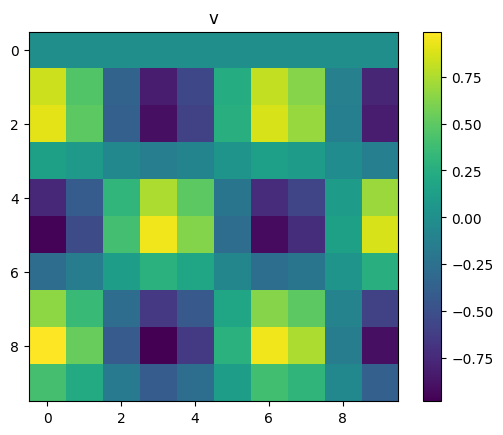

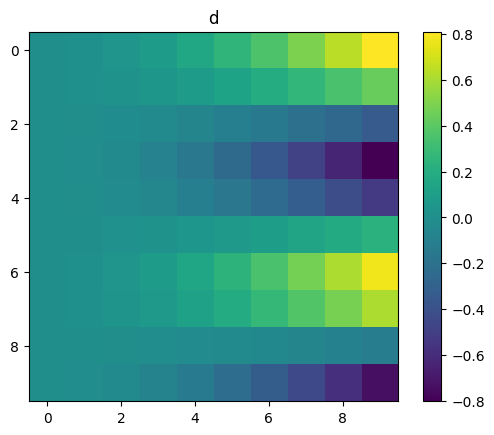

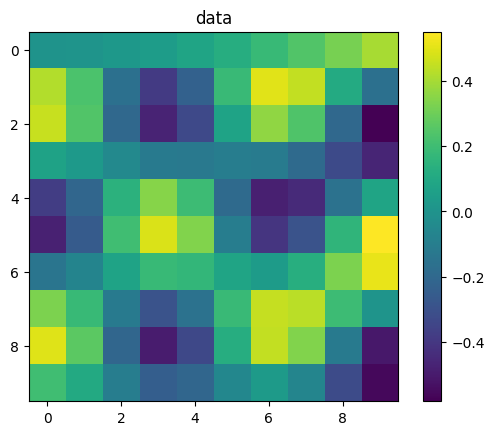

In [6]:
# dyn
import matplotlib.pyplot as plt
Mperdim = int(np.sqrt(Nx))
a = np.arange(Mperdim)
term1 = 0.01*a**2
term2 = np.sin(a)
term3 = np.cos(a)

v_field = np.outer(term2,term3)
d_field = np.outer(term3,term1)

v=d=1
x_t = 0.5*v**2*v_field + 0.5*d**3*d_field

plt.imshow(v_field)
plt.colorbar()
plt.title('v')
plt.show()

plt.imshow(d_field)
plt.colorbar()
plt.title('d')
plt.show()

plt.imshow(x_t)
plt.colorbar()
plt.title('data')
plt.show()

## if identity data
# plt.imshow(yy[0].reshape((Mperdim,Mperdim)))
# plt.colorbar()
# plt.title('data yy')
# plt.show()

In [7]:
# #### Launch experiments

scriptname = "minimal" if nb else __file__
save_as = xps.launch(
    HMM, scriptname, setup=set_X0_and_simulate,
    mp=False,           # Multiprocessing
    fail_gently=False,  # Facilitate debugging
    liveplots=False,    # NB: Turn off if running iEnKS
    free=False,         # Don't delete time series (enables replay)
)

Experiment gets stored at /home/dgrund/dpr_data/minimal/run_2024-01-04__17-29-22


Truth & Obs:   0%|          | 0/1 [00:00<?, ?it/s]

EnKF:   0%|          | 0/1 [00:00<?, ?it/s]

/home/dgrund/.conda/envs/dapper-env/lib/python3.9/site-packages/patlib/std.py:52: UserWarning: Numerical error in stat comps.
Probably caused by a sample variance of 0.
  return fun(*args, **kwargs)


In [8]:
# #### Show results

# Load data
xps = dpr.xpList(dpr.load_xps(save_as))

Loading 1 files from /home/dgrund/dpr_data/minimal/run_2024-01-04__17-29-22


Loading:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
print(xps.tabulate_avrgs([
    "rmse.state.a", "rmv.state.a",
    "rmse.param.a", "rmv.param.a",
]))

   |  rmse.state.a  1σ   rmv.state.a  1σ   rmse.param.a  1σ   rmv.param.a  1σ 
-  -  -----------------  ----------------  -----------------  ----------------
0  |     0.0006135 ±nan    0.0009561 ±nan        0.1431 ±nan      0.07876 ±nan


In [10]:
# # Plots --- only for time series
# xps[-1].stats.replay(
#     # t1=0,
#     # t2=np.inf,
# )

In [11]:
np.shape(xps[0].stats.mu.a)

(1, 102)

In [12]:
def print_summary_params(xp):
    print('ANALYSIS')
    print(f'mean:\t{xp.stats.mu.a[:,Nx:]}')
    print(f'spread:\t{xp.stats.spread.a[:,Nx:]}')
    print()
    print('FORECAST')
    print(f'mean:\t{xp.stats.mu.f[:,Nx:]}')
    print(f'spread:\t{xp.stats.spread.f[:,Nx:]}')
print_summary_params(xps[0])
# expect: mean towards truth, spread reduction

ANALYSIS
mean:	[[0.09110178 2.92593056]]
spread:	[[0.64121418 0.4572759 ]]

FORECAST
mean:	[[-0.30726788 -0.12854741]]
spread:	[[0.83562818 1.03532296]]


In [13]:
xp = xps[0]

m = np.squeeze(xp.stats.mu.a)
s = np.squeeze(xp.stats.spread.a)

POST_MEAN_PARAMS = m[Nx:]
POST_VAR_PARAMS = s[Nx:]

POST_MEAN_STATE = m[:Nx]
POST_VAR_STATE = s[:Nx]

In [14]:
# xps[0].stats.spread
# xps[0].stats.__dict__['mu']

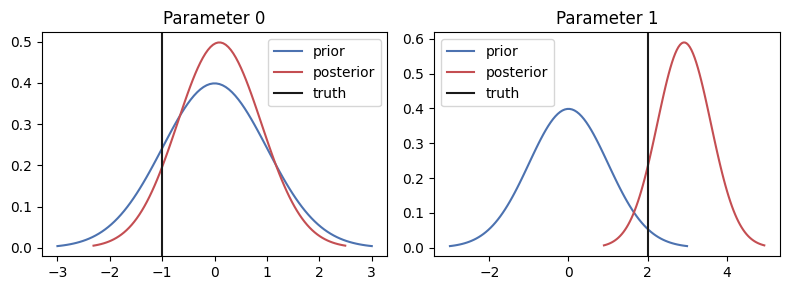

In [15]:
### Bayesian plot
# missing: obs and single ensemble members

import scipy.stats as stats
import matplotlib.pyplot as plt

# def plot_priors_params():
fig, axs = plt.subplots(1,Np, figsize=(Np*4,3))

def plot_norm(ax,mu,var,label):
    sigma = np.sqrt(var)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    c = 'b' if label=='prior' else 'r'
    ax.plot(x, stats.norm.pdf(x, mu, sigma),c, label=label)
    

# params
for i in range(Np):
    plot_norm(axs[i],PRIOR_MEAN_PARAMS[i],PRIOR_VAR_PARAMS[0],'prior')
    plot_norm(axs[i],POST_MEAN_PARAMS[i],POST_VAR_PARAMS[i],'posterior')
    axs[i].axvline(TRUE_PARAMS[i],c='k', label='truth')
    axs[i].legend()
    axs[i].set_title(f'Parameter {i}')


plt.tight_layout()
plt.show()

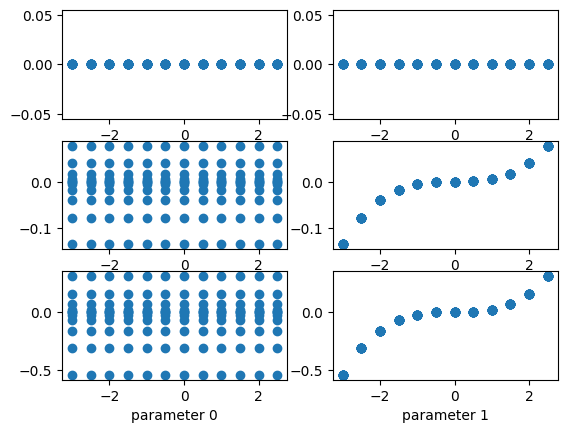

In [16]:
### sample target function -- Obs = partial_Id_Obs size 3
import itertools

space = np.arange(-3,3,0.5)
Ns = len(space)
result = []
for v,d in itertools.product(space,space):
    # print(x,v,d)
    x = np.ones((Mperdim,Mperdim))
    obs = call_dummy(x,[v,d],0,0) 
    # one scalar measurement plotted --> reaction depends on lication!
    result.append([v,d, obs[0], obs[1], obs[2]])
result = np.array(result).T

fig,axs = plt.subplots(3,2)
for i in range(3):
    axs[i,0].scatter(result[0], result[2+i])
    axs[i,0].set_xlabel('parameter 0')

    axs[i,1].scatter(result[1], result[2+i])
    axs[i,1].set_xlabel('parameter 1')

plt.show()

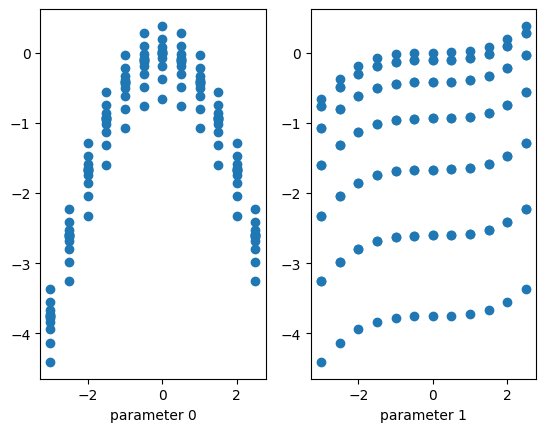

In [127]:
### sample target function -- Obs = Id_Obs
import itertools

space = np.arange(-3,3,0.5)
Ns = len(space)
result = []
for v,d in itertools.product(space,space):
    # print(x,v,d)
    x = np.ones((Mperdim,Mperdim))
    observable = call_dummy(x,[v,d],0,0)[13] 
    # one scalar measurement plotted --> reaction depends on lication!
    result.append([v,d, observable])
result = np.array(result).T

fig,axs = plt.subplots(1,2)

axs[0].scatter(result[0], result[2])
axs[0].set_xlabel('parameter 0')

axs[1].scatter(result[1], result[2])
axs[1].set_xlabel('parameter 1')

plt.show()

In [120]:
### sample obs likelihood

# sample x,v,d from prior/post and eval y -> spreads
# eval y separate for prior/post mean and truth -> means

# add to bayesian plot